# Jonathan Halverson
# Tuesday, January 8, 2018
# FFT and Autocorrelation function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

In [2]:
Fs = 1000.0;            # Sampling frequency                    
T = 1/Fs;             # Sampling period       
L = 1500;             # Length of signal
t = np.arange(0, L-1) * T;        # Time vector

In [3]:
S = 0.7*np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)

In [4]:
X = S + 2*np.random.randn(t.size)

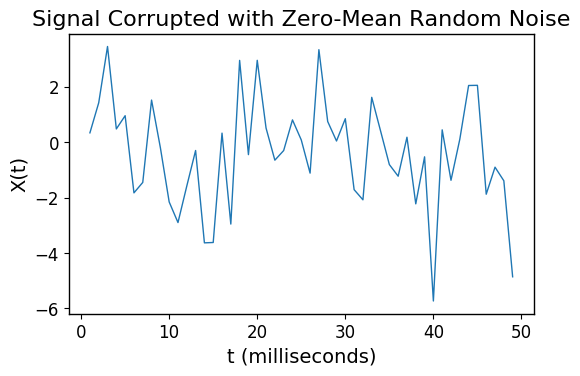

In [5]:
plt.plot(1000*t[1:50],X[1:50])
plt.title('Signal Corrupted with Zero-Mean Random Noise')
plt.xlabel('t (milliseconds)')
plt.ylabel('X(t)')

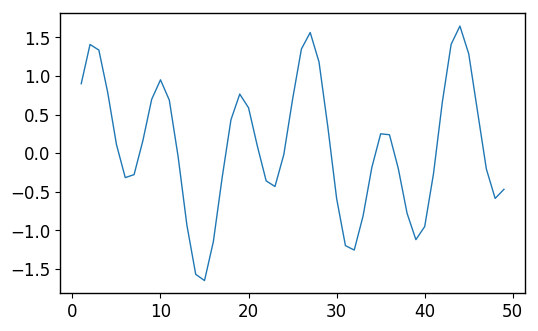

In [6]:
plt.plot(1000 * t[1:50], S[1:50])

In [7]:
Y = np.fft.fft(X)

In [8]:
P2 = abs(Y/L)
P1 = P2[1:L/2+1]
P1[2:-1] = 2*P1[2:-1]

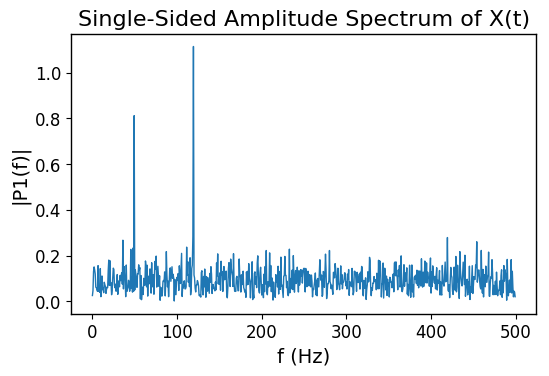

In [9]:
f = Fs*np.arange(0,(L/2))/L;
plt.plot(f,P1)
plt.title('Single-Sided Amplitude Spectrum of X(t)')
plt.xlabel('f (Hz)')
plt.ylabel('|P1(f)|')

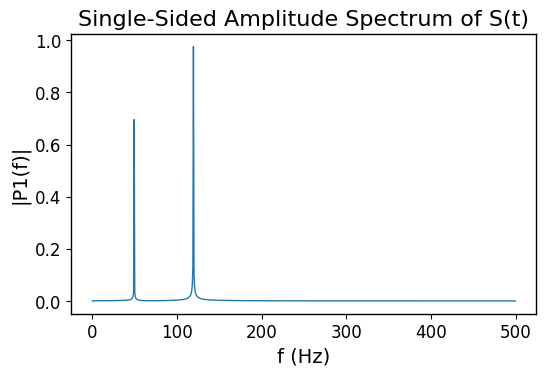

In [10]:
Y = np.fft.fft(S)
P2 = abs(Y/L)
P1 = P2[1:L/2+1]
P1[2:-1] = 2*P1[2:-1];

plt.plot(f,P1) 
plt.title('Single-Sided Amplitude Spectrum of S(t)')
plt.xlabel('f (Hz)')
plt.ylabel('|P1(f)|')

# Autocorrelation function

In [11]:
t = np.linspace(0.0, 1.0, num=250)
y = np.sin(2.0 * np.pi * t) + 2 * np.sin(2.0 * np.pi * 3 * t) + 2.0 + np.random.randn(t.size)

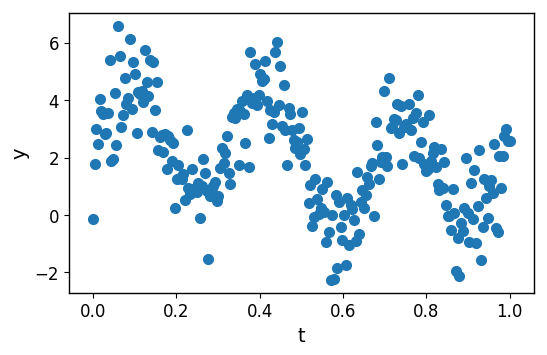

In [12]:
plt.scatter(t, y)
plt.xlabel('t')
plt.ylabel('y')

In [13]:
z = y - y.mean()

### I. Direct approach

In [14]:
ct = np.zeros(z.size, dtype=np.int)
acf = np.zeros(z.size, dtype=np.float64)

for i in xrange(z.size):
     zi = z[i]
     for j in xrange(i, z.size):
          dt = j - i
          ct[dt] += 1
          acf[dt] += zi * z[j]
acf /= ct
acf /= acf[0]

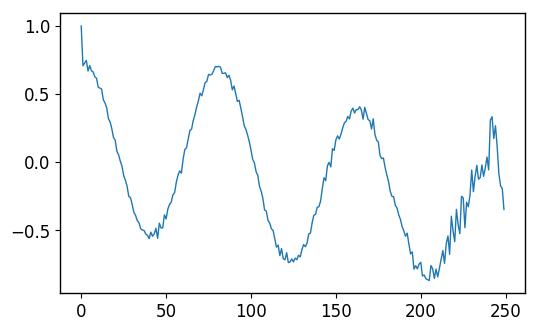

In [15]:
plt.plot(acf)

### II. FFT approach

In [16]:
def autocorr(x):
     """Takes a list and returns the autocorrelation function as a numpy array."""
     s = np.fft.fft(x, n = 2 * x.size)
     acf = np.real(np.fft.ifft(s * np.conjugate(s)))[:x.size]
     for i in range(acf.size):
          acf[i] = acf[i] / (acf.size - i)
     return acf

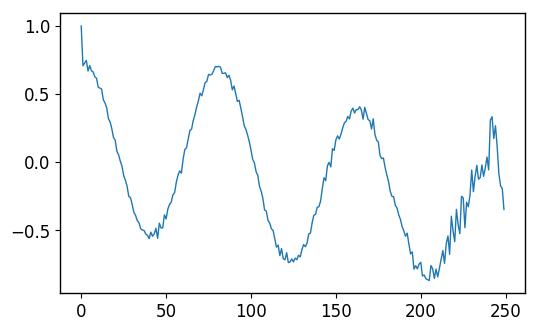

In [17]:
X = autocorr(z)
plt.plot(X/X[0])

In [18]:
np.allclose(acf, X / X[0])

True

### III. Numpy correlate function

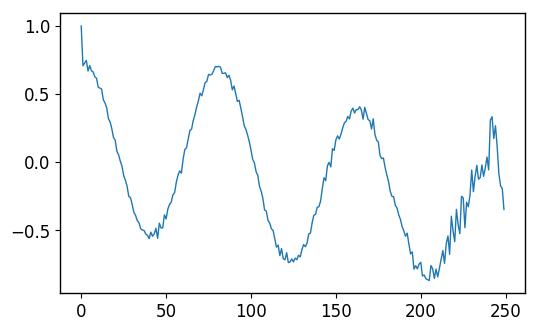

In [19]:
X = np.correlate(z, z, 'fill')[z.size-1:] / ct
plt.plot(X / X[0])

### IV. Scipy correlate function

In [20]:
from scipy.signal import correlate

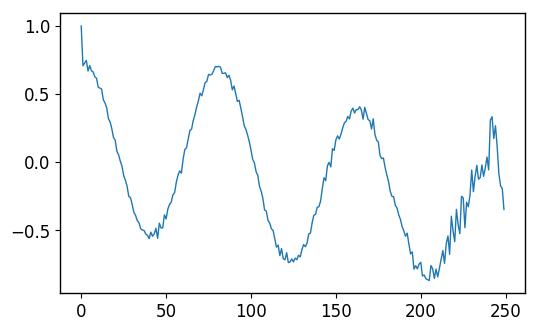

In [21]:
X = correlate(z, z, mode='full', method='direct')[z.size-1:] / ct
plt.plot(X / X[0])